In [1]:
import os
import nltk
import regex as re
from nltk.tokenize import word_tokenize
import pickle
from PIL import Image, ImageDraw, ImageFont
import math
from scipy import spatial
import numpy as np
import requests
from tkinter import Y
import PIL
import io
import urllib
import json
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from scipy import spatial
import sklearn 
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.cluster import KMeans
import networkx as nx
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from datetime import datetime
from random import sample
import umap.umap_ as umap
import hdbscan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import keras
import sys
from bs4 import BeautifulSoup
import random
import glob

In [2]:

list_values = [0,0.2,0.4,0.6,0.8,1]
data_frame = pd.DataFrame()

place =  os.getcwd()        

In [3]:
#create relevant lists

dict_happened = {}
original_string = []
color_input = []
type_input = []
text_input = []
flavor_input = []
color_score = []
type_score = []
text_score = []
flavor_score = []


In [4]:
#find the sum of values
for a in list_values:
    for b in list_values:
        for c in list_values:
            for d in list_values:
                if a != 0 or b!= 0 or c !=0 or d!= 0:
                    string = f'co{a},ty{b},te{c},fl{d}'
                    file = open(f'{place}\\static\\test_user_input\\{string}_list.pickle','rb')
                    list_to_add = pickle.load(file)
                    file.close()
                    if f'{a}{b}{c}{d}' in dict_happened:
                        pass
                    else:
                        dict_happened[f'{a}{b}{c}{d}'] = True
                        original_string.append(string)
                        color_input.append(a)
                        type_input.append(b)
                        text_input.append(c)
                        flavor_input.append(d)
                        list_before = list_to_add[0]
                        list_after = list_to_add[2]
                        sum = 0.0
                        for count,each in enumerate(list_before):
                            difference  = spatial.distance.cosine(each[0],list_after[count][0])
                            sum = sum + difference
                        color_score.append(sum)
                        sum = 0.0
                        for count,each in enumerate(list_before):
                            difference  = spatial.distance.cosine(each[1],list_after[count][1])
                            sum = sum + difference
                        type_score.append(sum)
                        sum = 0.0
                        for count,each in enumerate(list_before):
                            difference  = spatial.distance.cosine(each[2],list_after[count][2])
                            sum = sum + difference
                        text_score.append(sum)
                        sum = 0.0
                        for count,each in enumerate(list_before):
                            difference  = spatial.distance.cosine(each[3],list_after[count][3])
                            sum = sum + difference
                        flavor_score.append(sum)

In [5]:
#input into dataframe

data_frame['Original_Scores'] = original_string
data_frame['Color_Input'] = color_input
data_frame['Type_Input'] = type_input
data_frame['Text_Input'] = text_input
data_frame['Flavor_Input'] = flavor_input
data_frame['Color_Score'] = color_score
data_frame['Type_Score'] = type_score
data_frame['Text_Score'] = text_score
data_frame['Flavor_Score'] = flavor_score


In [6]:
import openpyxl

data_frame.to_excel("output.xlsx",
             sheet_name='user_input_data')  

In [7]:
data_frame.head()

,Original_Scores,Color_Input,Type_Input,Text_Input,Flavor_Input,Color_Score,Type_Score,Text_Score,Flavor_Score
0,"co0,ty0,te0,fl0.2",0.0,0.0,0.0,0.2,5.883708,32.896371,377.669075,46.872426
1,"co0,ty0,te0,fl0.4",0.0,0.0,0.0,0.4,7.178828,36.517399,359.852158,47.879292
2,"co0,ty0,te0,fl0.6",0.0,0.0,0.0,0.6,5.230469,33.280668,318.776399,50.000489
3,"co0,ty0,te0,fl0.8",0.0,0.0,0.0,0.8,5.955961,28.491279,352.196926,48.182610
4,"co0,ty0,te0,fl1",0.0,0.0,0.0,1.0,5.538059,32.167531,304.201372,48.782614


In [8]:
data_frame.describe()

,Color_Input,Type_Input,Text_Input,Flavor_Input,Color_Score,Type_Score,Text_Score,Flavor_Score
count,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000,1295.000000
mean,0.500386,0.500386,0.500386,0.500386,3.984846,18.921617,274.669910,35.870133
std,0.341546,0.341546,0.341546,0.341546,0.851576,4.218412,22.560474,7.863333
min,0.000000,0.000000,0.000000,0.000000,2.282582,10.050852,226.264585,12.868313
25%,0.200000,0.200000,0.200000,0.200000,3.414456,16.089010,259.261386,30.644719
50%,0.600000,0.600000,0.600000,0.600000,3.833367,18.285838,271.616075,36.494744
75%,0.800000,0.800000,0.800000,0.800000,4.385924,20.982469,286.630645,41.777229
max,1.000000,1.000000,1.000000,1.000000,8.894493,49.094923,415.368016,57.092324


In [9]:
print(data_frame.columns)
data_frame_smaller = data_frame[data_frame["Text_Input"] >= 1]

data_frame_smaller.describe()

Index(['Original_Scores', 'Color_Input', 'Type_Input', 'Text_Input',
       'Flavor_Input', 'Color_Score', 'Type_Score', 'Text_Score',
       'Flavor_Score'],
      dtype='object')


,Color_Input,Type_Input,Text_Input,Flavor_Input,Color_Score,Type_Score,Text_Score,Flavor_Score
count,216.000000,216.000000,216.0,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.500000,0.500000,1.0,0.500000,3.853599,18.456559,271.956053,34.513722
std,0.342358,0.342358,0.0,0.342358,0.802609,4.118153,20.220857,7.753079
min,0.000000,0.000000,1.0,0.000000,2.547131,10.567333,230.975348,14.321189
25%,0.200000,0.200000,1.0,0.200000,3.314334,15.474119,258.256264,28.491163
50%,0.500000,0.500000,1.0,0.500000,3.718109,17.960766,270.329706,34.640831
75%,0.800000,0.800000,1.0,0.800000,4.228649,20.743928,283.094719,40.626114
max,1.000000,1.000000,1.0,1.000000,7.386185,49.094923,351.215693,50.990509


      Color_Input  Color_Score  Type_Input  Type_Score  Text_Input   
0             0.0     5.883708         0.0   32.896371         0.0  \
1             0.0     7.178828         0.0   36.517399         0.0   
2             0.0     5.230469         0.0   33.280668         0.0   
3             0.0     5.955961         0.0   28.491279         0.0   
4             0.0     5.538059         0.0   32.167531         0.0   
...           ...          ...         ...         ...         ...   
1290          1.0     3.319074         1.0   15.199452         1.0   
1291          1.0     4.996800         1.0   21.083717         1.0   
1292          1.0     4.931851         1.0   13.754999         1.0   
1293          1.0     2.987153         1.0   17.478937         1.0   
1294          1.0     2.959821         1.0   11.187496         1.0   

      Text_Score  Flavor_Input  Flavor_Score  
0     377.669075           0.2     46.872426  
1     359.852158           0.4     47.879292  
2     318.776399  

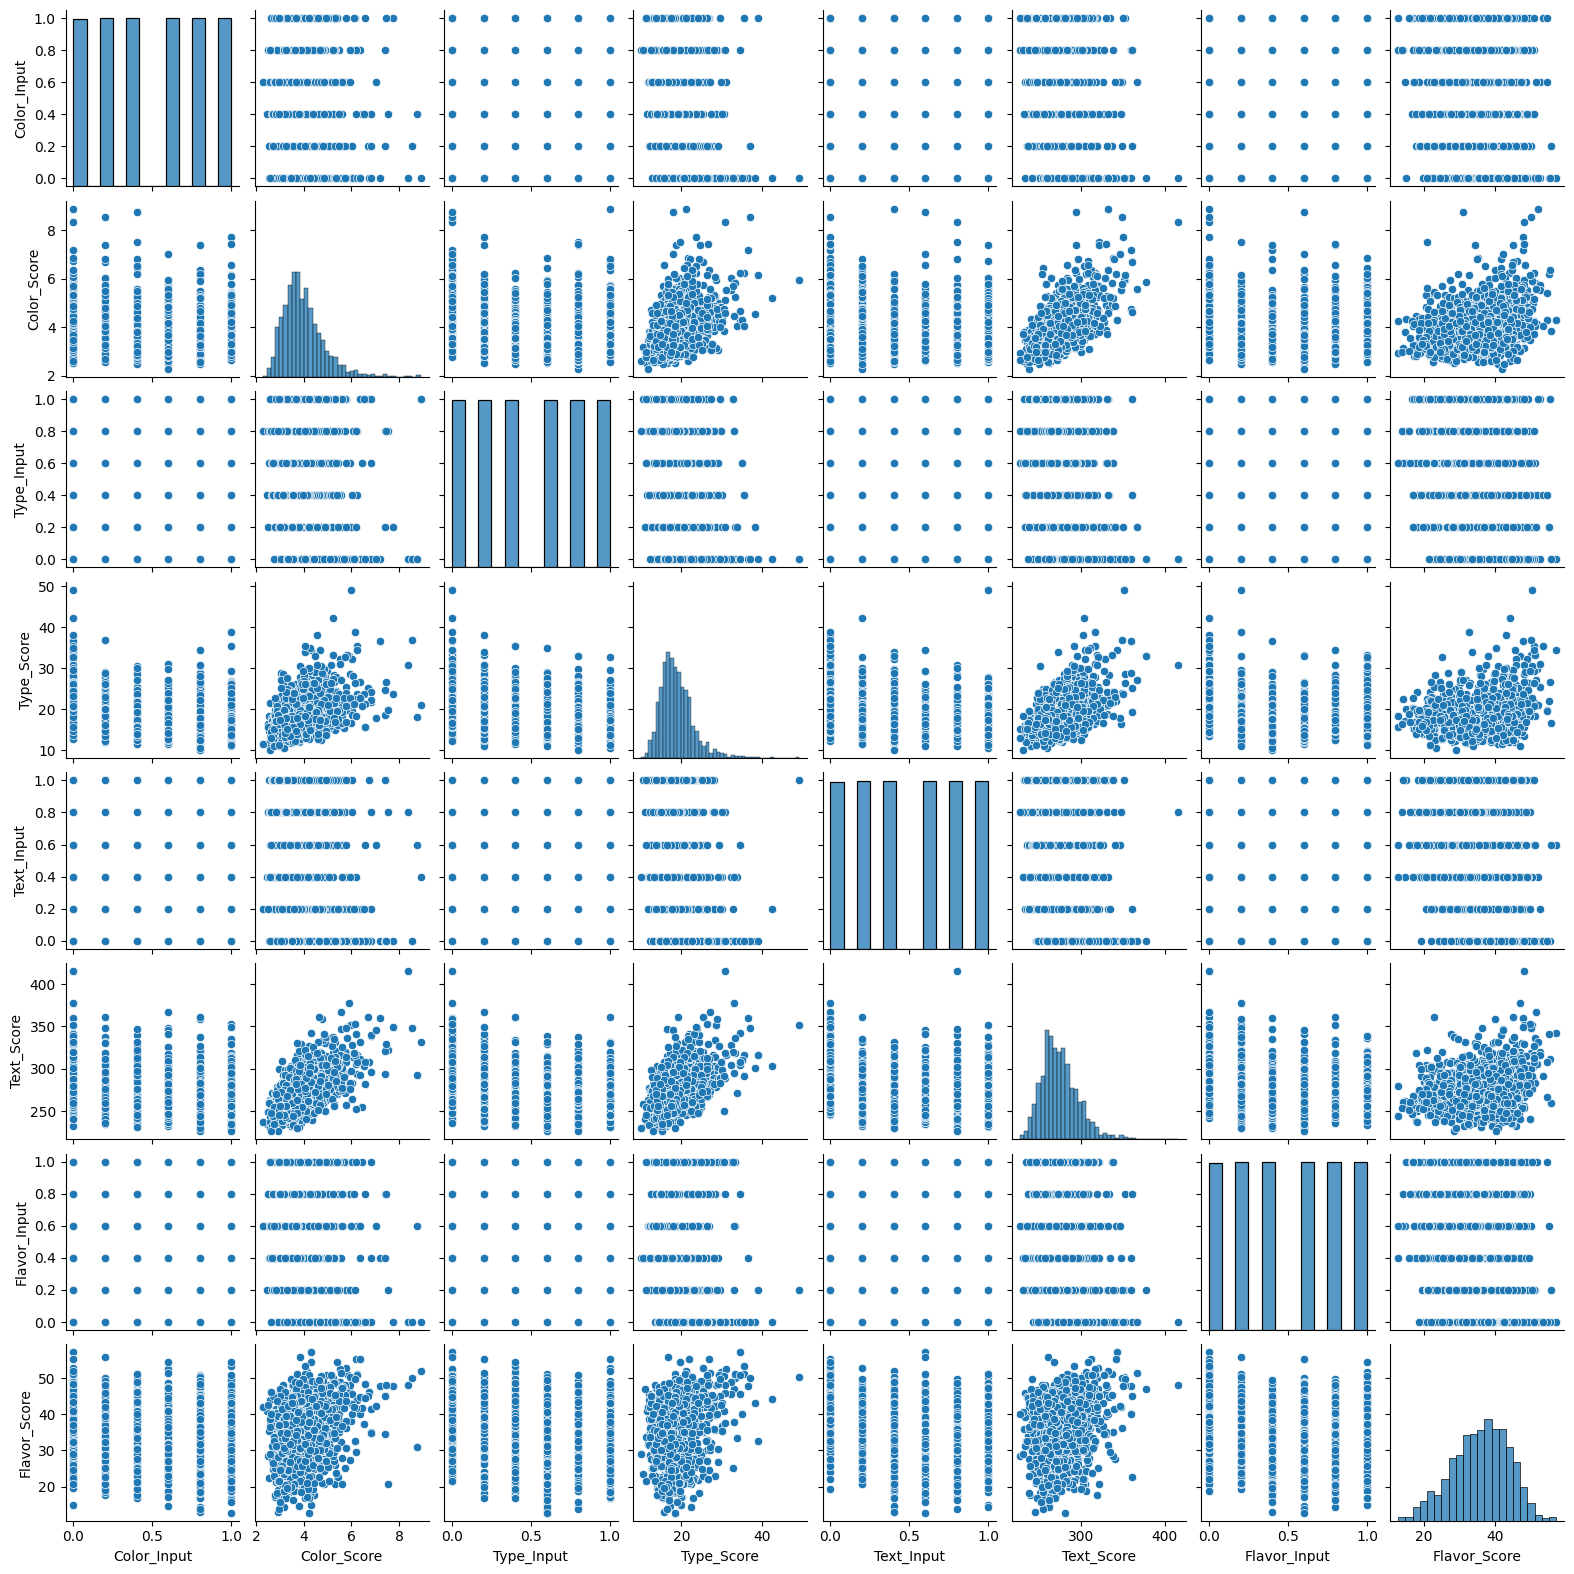

In [10]:
cols = ['Color_Input','Color_Score','Type_Input','Type_Score','Text_Input','Text_Score','Flavor_Input','Flavor_Score']
%matplotlib inline
import seaborn as sns
print(data_frame[cols])
sns.pairplot(data_frame[cols], height=2.0)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
cols_selected = ['Color_Input', 'Type_Input', 'Text_Input', 'Flavor_Input','Color_Score']
X = data_frame[cols_selected].iloc[:,0:4].values     
y = data_frame[cols_selected]['Color_Score']     

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

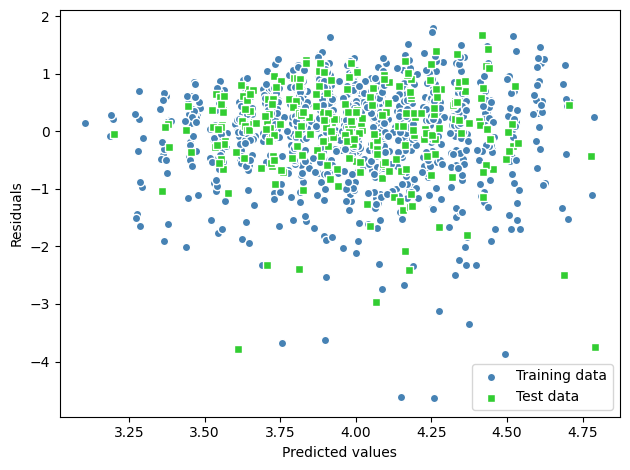

In [14]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
#plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
#plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.629, test: 0.634
R^2 train: 0.127, test: 0.148


In [16]:
slr.fit(X_train, y_train).intercept_

4.871966648475059

In [17]:
slr.fit(X_train, y_train).coef_

array([-0.41118979, -0.42506531, -0.47359138, -0.45679659])

In [18]:
list_means = []
mean_color_score = data_frame['Color_Score'].mean()
mean_color_score = mean_color_score - data_frame['Color_Score'].min()
list_means.append(mean_color_score)
mean_type_score = data_frame['Type_Score'].mean()
mean_type_score = mean_type_score - data_frame['Type_Score'].min()
list_means.append(mean_type_score)
mean_text_score = data_frame['Text_Score'].mean()
mean_text_score = mean_text_score - data_frame['Text_Score'].min()
list_means.append(mean_text_score)
mean_flavor_score = data_frame['Flavor_Score'].mean()
mean_flavor_score = mean_flavor_score - data_frame['Flavor_Score'].min()
list_means.append(mean_flavor_score)

In [19]:
max_mean = max(list_means)
new_scores = []
new_color_score_scaler = max_mean/mean_color_score
new_scores.append(new_color_score_scaler)
new_type_score_scaler = max_mean/mean_type_score
new_scores.append(new_type_score_scaler)
new_text_score_scaler = max_mean/mean_text_score
new_scores.append(new_text_score_scaler)
new_flavor_score_scaler = max_mean/mean_flavor_score
new_scores.append(new_flavor_score_scaler)

In [20]:
list_standard_deviations = []
standard_deviations_color_score = data_frame['Color_Score'].std()
list_standard_deviations.append(mean_color_score)
standard_deviations_type_score = data_frame['Type_Score'].std()
list_standard_deviations.append(mean_type_score)
standard_deviations_text_score = data_frame['Text_Score'].std()
list_standard_deviations.append(mean_text_score)
standard_deviations_flavor_score = data_frame['Flavor_Score'].std()
list_standard_deviations.append(mean_flavor_score)

In [21]:
print(new_scores)
both_scores = [new_scores,list_standard_deviations]
both_scores

[28.43585551234278, 5.456724991476718, 1.0, 2.1044128591830007]


[[28.43585551234278, 5.456724991476718, 1.0, 2.1044128591830007],
 [1.7022637097992033,
  8.870764968247947,
  48.405324895754745,
  23.001819573820327]]

In [22]:
with open(f"static\\both_scores.pickle", "wb") as fp:
    pickle.dump(both_scores, fp)